In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the tanh activation function and its derivative
def tanh(x):
    return np.tanh(x)


def tanh_derivative(x):
    return 1.0 - x ** 2

In [4]:
def initialize_network(input_size, hidden_size, output_size):
    """Initialize weights and biases for the neural network."""
    weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    bias_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    bias_output = np.zeros((1, output_size))
    
    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

def forward(x, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    """Perform a forward pass through the network."""
    hidden = tanh(np.dot(x, weights_input_hidden) + bias_hidden)
    output = tanh(np.dot(hidden, weights_hidden_output) + bias_output)
    return hidden, output

def backpropagation(x, y, hidden, output, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate):
    """Perform backpropagation and update weights and biases."""
    # Calculate the error
    output_error = y - output
    hidden_error = output_error.dot(weights_hidden_output.T)
    
    # Gradient descent
    d_output = output_error * tanh_derivative(output)
    d_hidden = hidden_error * tanh_derivative(hidden)
    
    # Update weights and biases
    weights_hidden_output += hidden.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += x.T.dot(d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
    
    return np.mean(np.abs(output_error)), weights_input_hidden, bias_hidden, weights_hidden_output, bias_output


In [5]:
# Given data
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape(-1, 1)
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321]).reshape(-1, 1)


In [6]:
# Initialize the neural network
weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = initialize_network(1, 10, 1)

# Training parameters
epochs = 1000
learning_rate = 0.05
errors = []
outputs_at_milestones = {}
epoch_milestones = [10, 100, 200, 400, 1000]

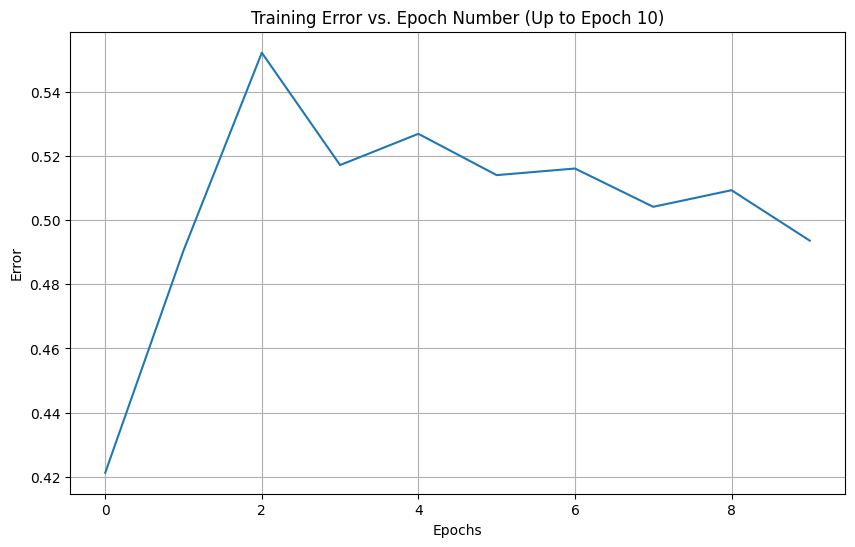

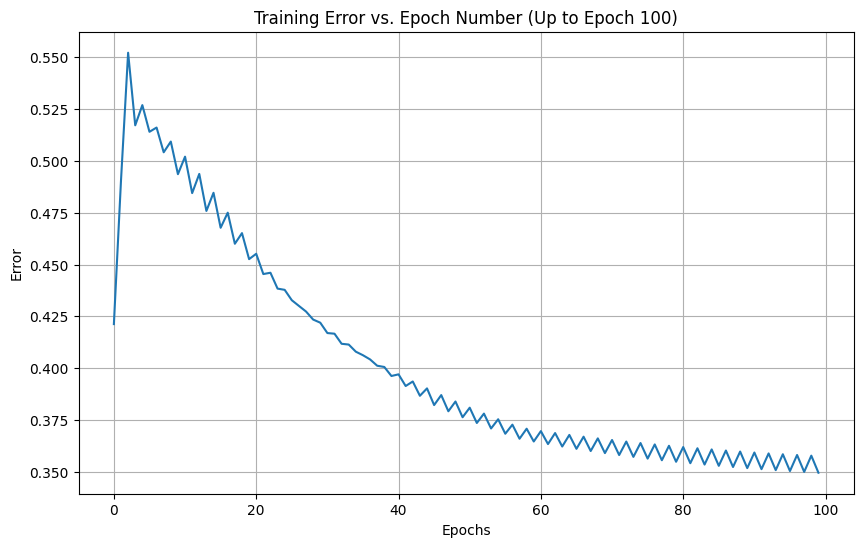

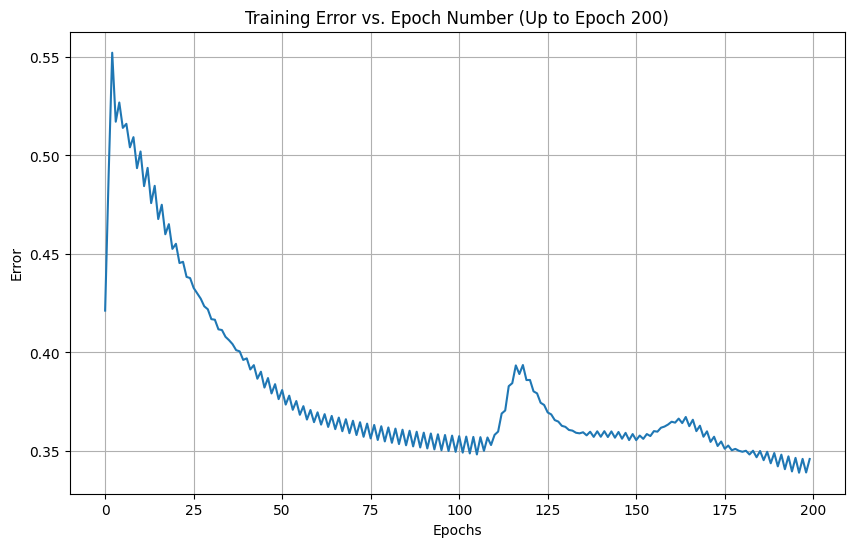

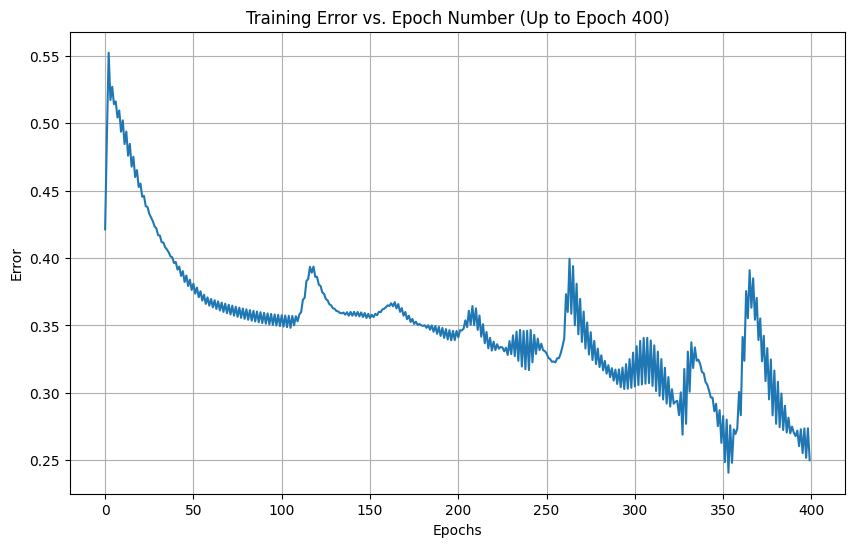

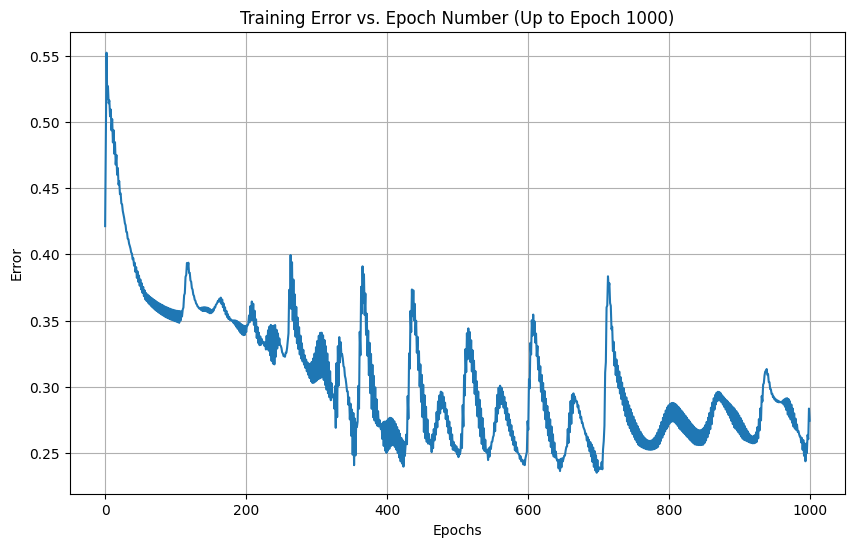

In [7]:
# Train the neural network
for epoch in range(1, epochs + 1):
    hidden, output = forward(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    error, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = backpropagation(X, Y, hidden, output, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate)
    errors.append(error)
    
    if epoch in epoch_milestones:
        _, outputs_at_milestones[epoch] = forward(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
        
        # Plot the training error vs. epoch number for the specific epoch
        plt.figure(figsize=(10, 6))
        plt.plot(errors)
        plt.xlabel("Epochs")
        plt.ylabel("Error")
        plt.title(f"Training Error vs. Epoch Number (Up to Epoch {epoch})")
        plt.grid(True)
        plt.savefig(f'error_vs_epoch_p2_{epoch}.svg', format='svg')
        plt.show()


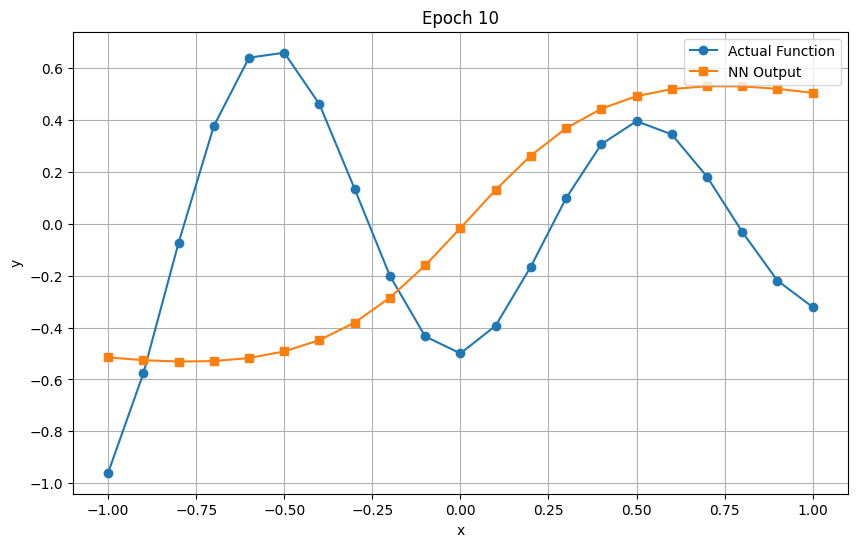

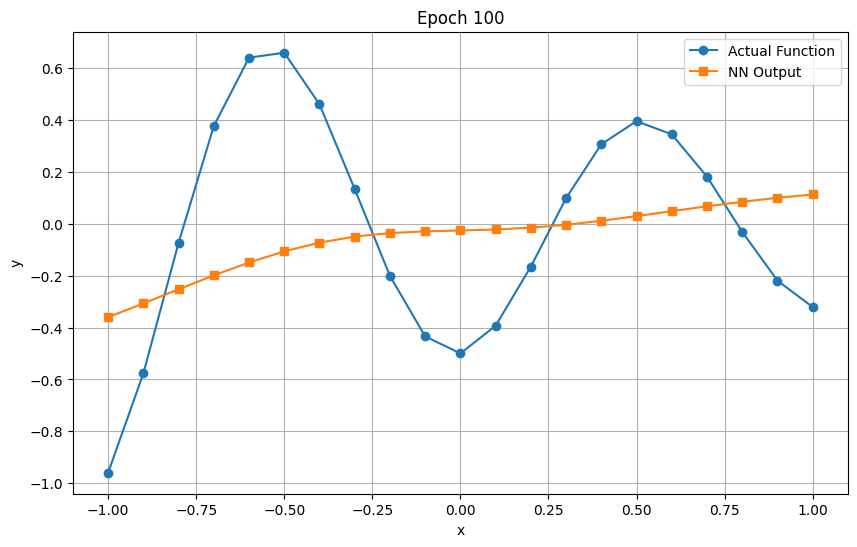

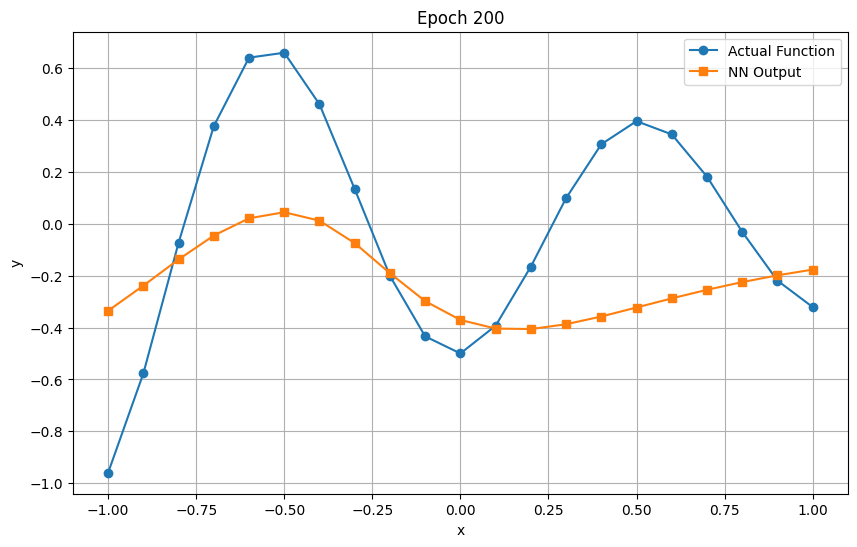

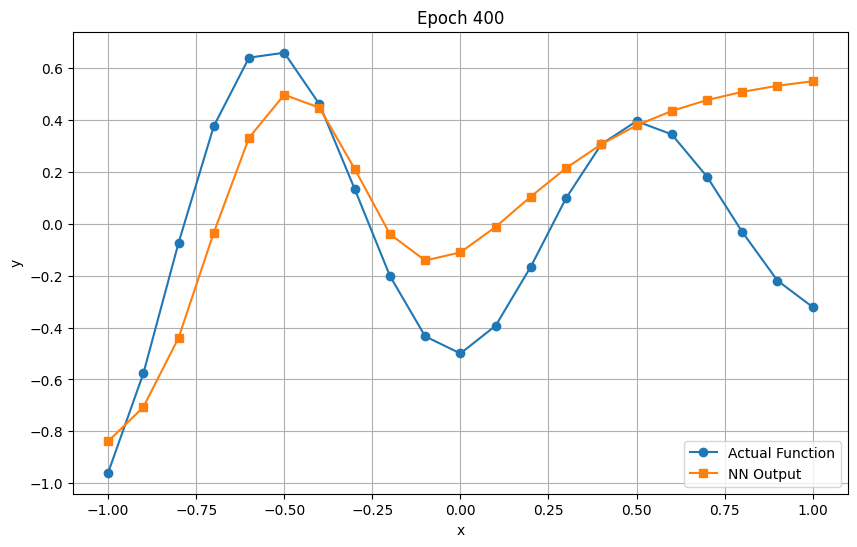

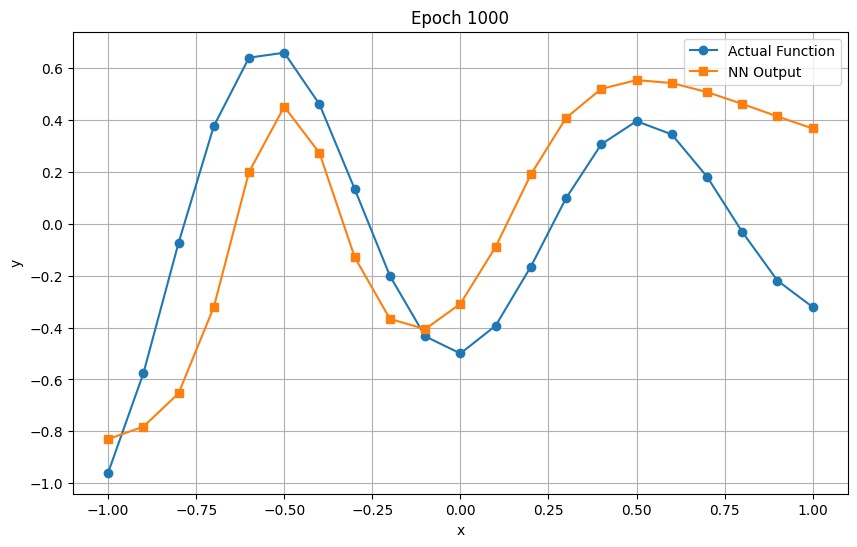

In [8]:
# Plotting f(x) vs x and NN output vs x at specified epochs
for epoch in epoch_milestones:
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, 'o-', label="Actual Function")
    plt.plot(X, outputs_at_milestones[epoch], 's-', label="NN Output")
    plt.title(f"Epoch {epoch}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'nn_approximate_e_{epoch}.svg', format='svg')
    plt.show()